In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-20.060460918687752 -103.7103693050533
-36.080849081063135 -48.59409991702526
86.2673890910095 175.18691034614312
46.46659806100013 -56.70723769807742
-20.584467456596343 52.055441181719345
-76.8957573674128 -129.08160867248608
48.825036157712645 -42.88442169400929
-88.11073712739604 105.46694933207857
-62.26866533847717 3.42030129565498
-35.23854784414099 120.32605029747208
-64.21211845384349 -149.63506624345746
5.286410675761573 111.9276842573388
-69.927520381174 -45.03703027325699
66.74743727618727 -11.008411289017573
44.088694567397965 -107.56009065156039
28.41346344653566 -45.51517425947452
66.16583430936078 -3.139686949885487
12.200619253512414 18.9375883693574
-26.765753460706748 -124.01002899279099
-36.181331760523975 173.60336535174724
-27.469233253499873 132.83120938079338
48.685565897758465 -69.23169344894957
83.65372733112363 -33.48156668116607
27.226057125090406 -8.386193244514004
-81.85407109357527 -139.5145775526537
-12.847543050354375 75.44378688858018
80.58267347295964

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [7]:
import requests

In [8]:
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=36372bcbc3afd77a8c52d1635268b62b


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | puerto ayora
Processing Record 2 of Set 12 | rio grande
Processing Record 3 of Set 12 | leningradskiy
Processing Record 4 of Set 12 | saint-pierre
Processing Record 5 of Set 12 | saint-paul
Processing Record 6 of Set 12 | rikitea
Processing Record 7 of Set 12 | torbay
Processing Record 8 of Set 12 | albany
Processing Record 9 of Set 12 | hermanus
Processing Record 10 of Set 12 | esperance
Processing Record 11 of Set 12 | mataura
Processing Record 12 of Set 12 | miri
Processing Record 13 of Set 12 | ushuaia
Processing Record 14 of Set 12 | hofn
Processing Record 15 of Set 12 | worland
Processing Record 16 of Set 12 | codrington
Processing Record 17 of Set 12 | klaksvik
Processing Record 18 of Set 12 | mongo
Processing Record 19 of Set 12 | dargaville
Processing Record 20 of Set 12 | yulara
Processing Record 21 of Set 12 | forestville
Processing Record 22 of Set 12 | illoqqortoormiut
City not foun

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,76.96,90,76,7.00,EC,2022-07-19 17:32:31
1,Rio Grande,-32.0350,-52.0986,62.71,71,0,7.92,BR,2022-07-19 17:35:38
2,Leningradskiy,69.3833,178.4167,33.82,98,100,12.86,RU,2022-07-19 17:35:38
3,Saint-Pierre,-21.3393,55.4781,67.91,68,0,9.22,RE,2022-07-19 17:35:39
4,Saint-Paul,-21.0096,55.2707,68.36,70,36,6.51,RE,2022-07-19 17:33:05
5,Rikitea,-23.1203,-134.9692,74.08,73,1,10.11,PF,2022-07-19 17:35:39
6,Torbay,47.6666,-52.7314,70.57,79,100,19.57,CA,2022-07-19 17:30:40
7,Albany,42.6001,-73.9662,89.58,48,4,1.99,US,2022-07-19 17:34:40
8,Hermanus,-34.4187,19.2345,47.80,74,46,5.32,ZA,2022-07-19 17:32:47
9,Esperance,-33.8667,121.9000,53.74,90,78,12.59,AU,2022-07-19 17:33:52


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-07-19 17:32:31,-0.7393,-90.3518,76.96,90,76,7.00
1,Rio Grande,BR,2022-07-19 17:35:38,-32.0350,-52.0986,62.71,71,0,7.92
2,Leningradskiy,RU,2022-07-19 17:35:38,69.3833,178.4167,33.82,98,100,12.86
3,Saint-Pierre,RE,2022-07-19 17:35:39,-21.3393,55.4781,67.91,68,0,9.22
4,Saint-Paul,RE,2022-07-19 17:33:05,-21.0096,55.2707,68.36,70,36,6.51
5,Rikitea,PF,2022-07-19 17:35:39,-23.1203,-134.9692,74.08,73,1,10.11
6,Torbay,CA,2022-07-19 17:30:40,47.6666,-52.7314,70.57,79,100,19.57
7,Albany,US,2022-07-19 17:34:40,42.6001,-73.9662,89.58,48,4,1.99
8,Hermanus,ZA,2022-07-19 17:32:47,-34.4187,19.2345,47.80,74,46,5.32
9,Esperance,AU,2022-07-19 17:33:52,-33.8667,121.9000,53.74,90,78,12.59


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

In [22]:
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658257144.763502

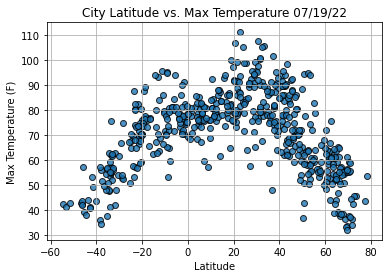

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

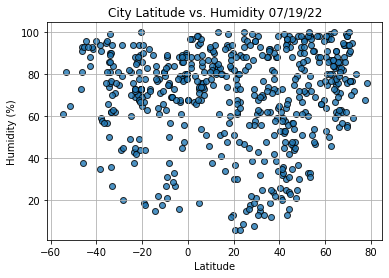

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

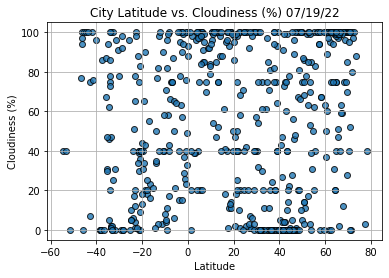

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

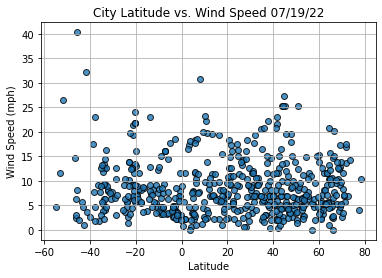

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()